In [1]:
from sklearn.decomposition import PCA
import os
import pandas as pd
import seaborn as sns
import seaborn as sn
import numpy as np
import statsmodels.api as sm

import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

#Redes neuronales
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout
from keras.layers import BatchNormalization
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from keras.callbacks import EarlyStopping
from keras import utils
import warnings
import keras_tuner  as kt
from keras.initializers import GlorotNormal
from keras.optimizers import Adam
from keras.layers import  Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from keras.optimizers import SGD

In [2]:
df =pd.read_csv("Video_juegos.csv", sep=",")

In [3]:
print(df.columns.values)

['Name' 'Platform' 'Year_of_Release' 'Genre' 'Publisher' 'NA_Sales'
 'EU_Sales' 'JP_Sales' 'Other_Sales' 'Global_Sales' 'Critic_Score'
 'Critic_Count' 'User_Score' 'User_Count' 'Developer' 'Rating']


In [4]:
columnas_dropear = ['Developer','Critic_Score', 'Critic_Count', 'User_Score', 'User_Count','Rating','Name', 'JP_Sales', 'EU_Sales', 'NA_Sales', 'Other_Sales']

df.drop(columnas_dropear, axis=1, inplace = True)

In [5]:
df.head()

,Platform,Year_of_Release,Genre,Publisher,Global_Sales
0,Wii,2006.0,Sports,Nintendo,82.53
1,NES,1985.0,Platform,Nintendo,40.24
2,Wii,2008.0,Racing,Nintendo,35.52
3,Wii,2009.0,Sports,Nintendo,32.77
4,GB,1996.0,Role-Playing,Nintendo,31.37


In [6]:
df['Year_of_Release'] = df['Year_of_Release']. fillna(df['Year_of_Release'].mean())

In [7]:
df = df.dropna(axis=0)

In [8]:
df.isna().sum()

Platform           0
Year_of_Release    0
Genre              0
Publisher          0
Global_Sales       0
dtype: int64

In [9]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


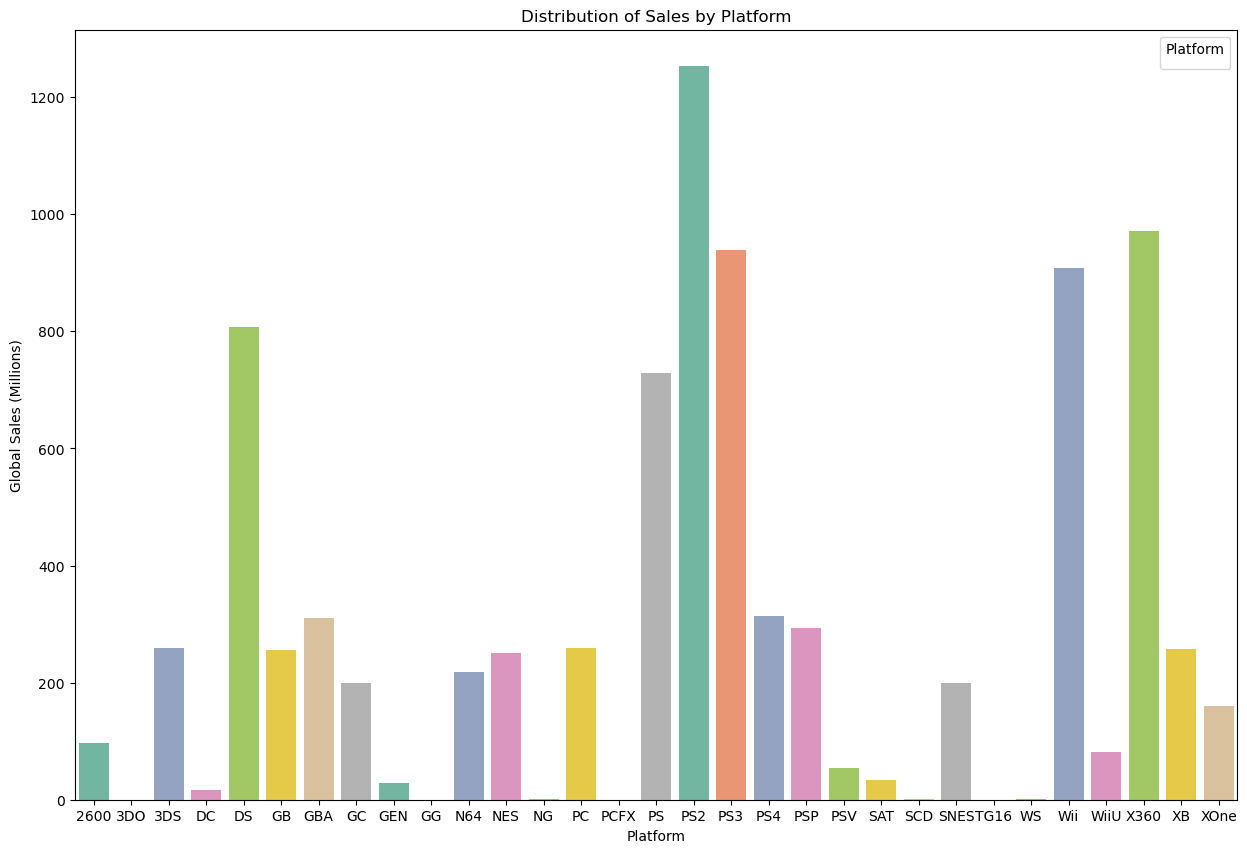

In [10]:
sales_by_platform = df.groupby('Platform')['Global_Sales'].sum()

plt.figure(figsize=(15, 10))
sns.barplot(x=sales_by_platform.index, y=sales_by_platform.values, palette='Set2')
plt.xlabel('Platform')
plt.ylabel('Global Sales (Millions)')
plt.title('Distribution of Sales by Platform')
plt.legend(title='Platform')
plt.show()

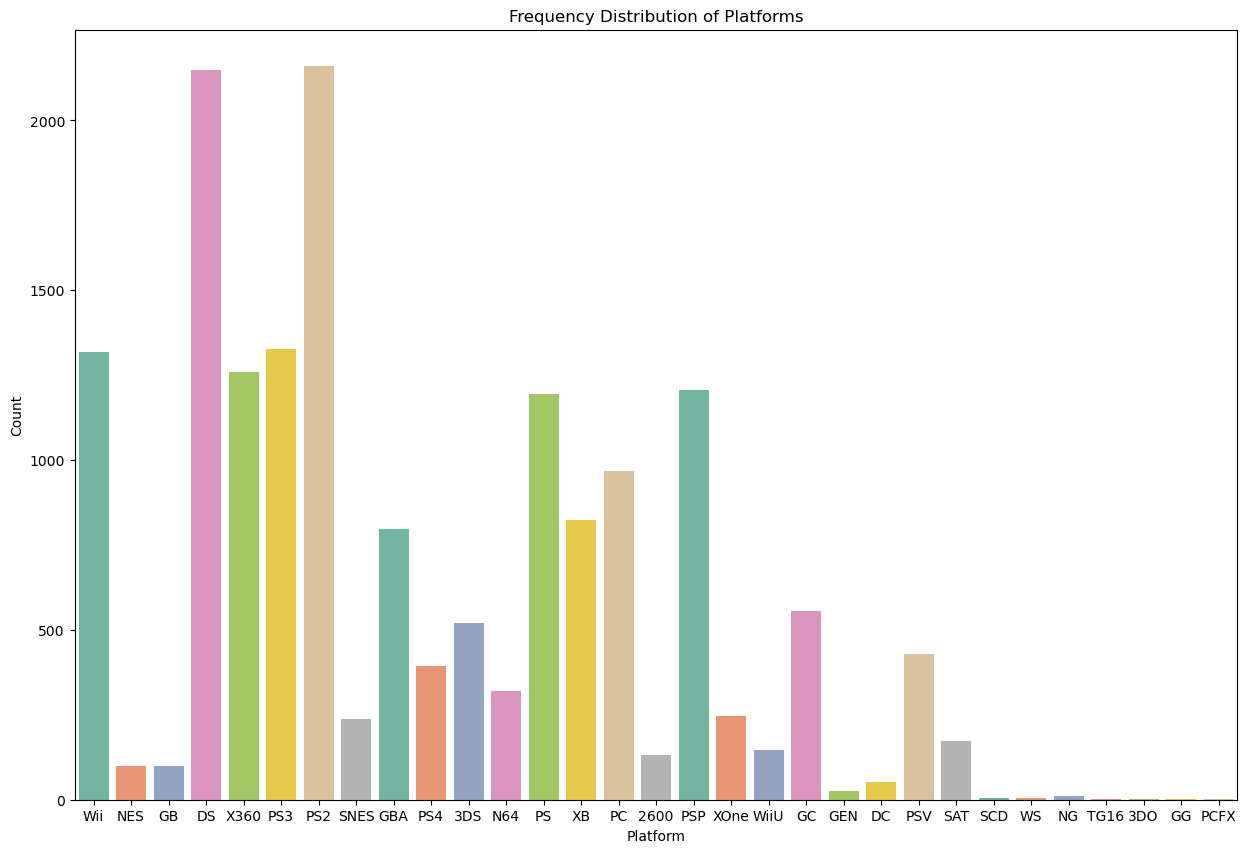

In [11]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Platform', data=df, palette='Set2')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.title('Frequency Distribution of Platforms')
plt.show()

In [12]:
consola_mesa = ["NES","SNES","N64","PS","PS2", "PS3", "PS4", "XB", "X360", "XOne", "Wii", "GC",
                "GEN", "DC", "2600", "TG16", "3DO", "SAT","Sega CD", "PCFX", "SCD"]

consola_mano= ["GB", "GBA", "DS", "3DS", "PSP", "PSV", "WS", "NG", "WiiU", "GG"]

pc = ["PC"]

In [13]:
df['Platform'] = df['Platform'].apply(lambda x: 'Consola_Mesa' if x in consola_mesa else x)
df['Platform'] = df['Platform'].apply(lambda x: 'Consola_Mano' if x in consola_mano else x)
df['Platform'] = df['Platform'].apply(lambda x: 'PC' if x in pc else x)
df['Platform'].value_counts()

Platform
Consola_Mesa    10332
Consola_Mano     5363
PC                968
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


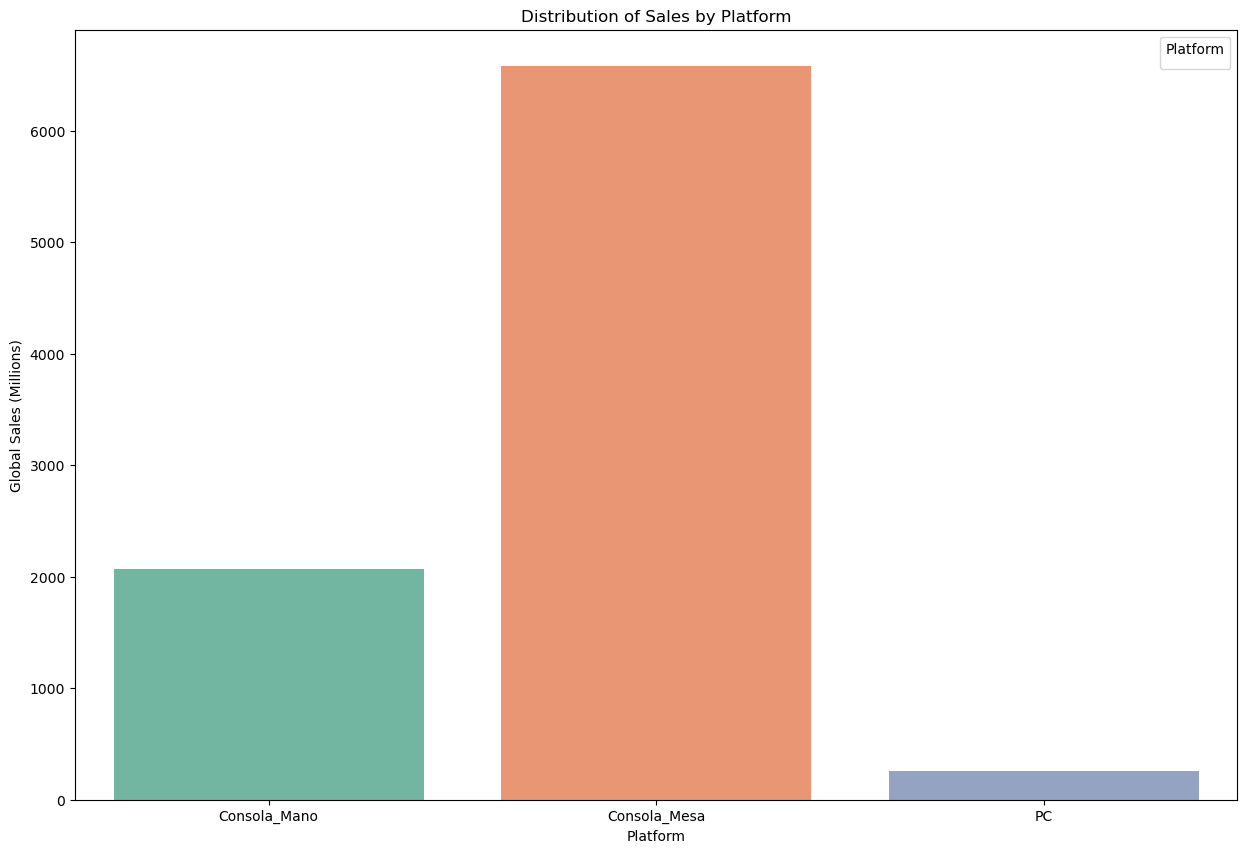

In [14]:
sales_by_platform = df.groupby('Platform')['Global_Sales'].sum()

plt.figure(figsize=(15, 10))
sns.barplot(x=sales_by_platform.index, y=sales_by_platform.values, palette='Set2')
plt.xlabel('Platform')
plt.ylabel('Global Sales (Millions)')
plt.title('Distribution of Sales by Platform')
plt.legend(title='Platform')
plt.show()

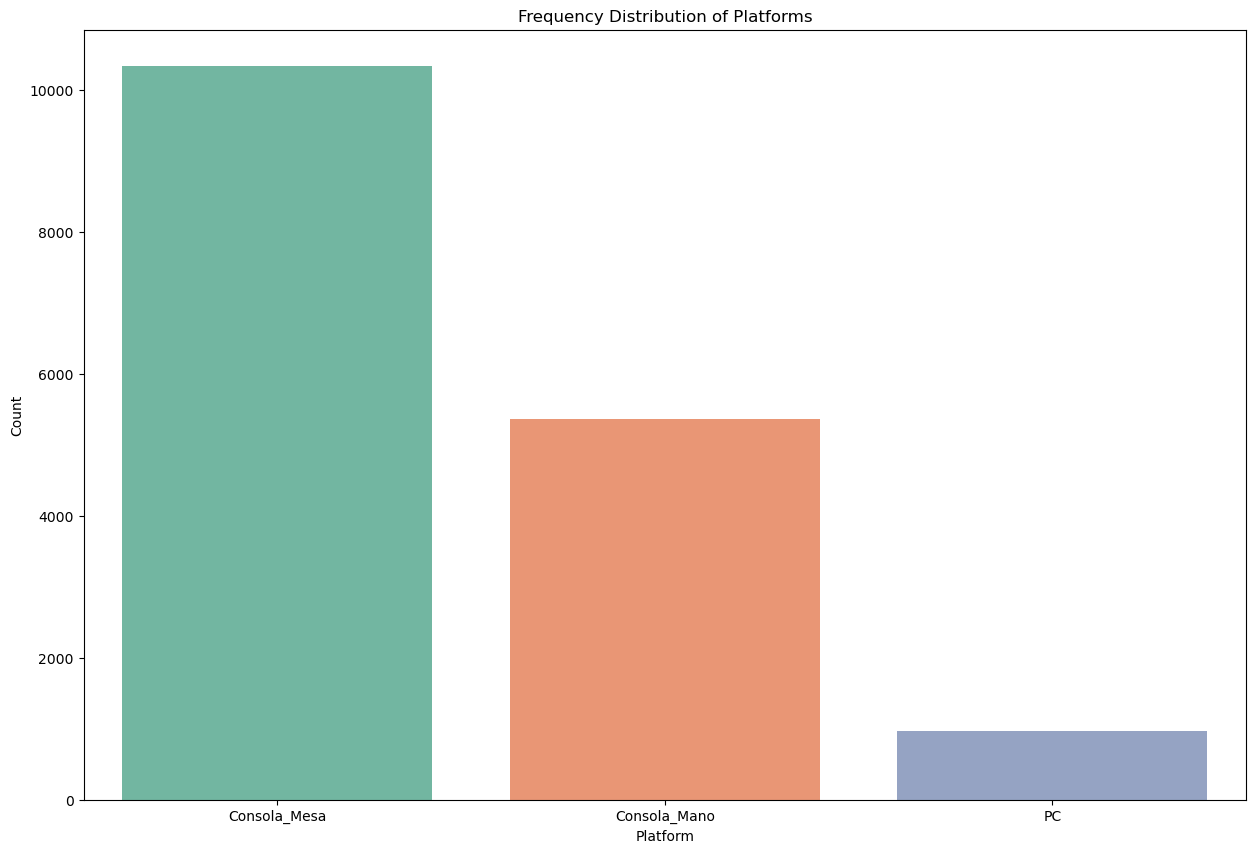

In [15]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Platform', data=df, palette='Set2')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.title('Frequency Distribution of Platforms')
plt.show()

In [16]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

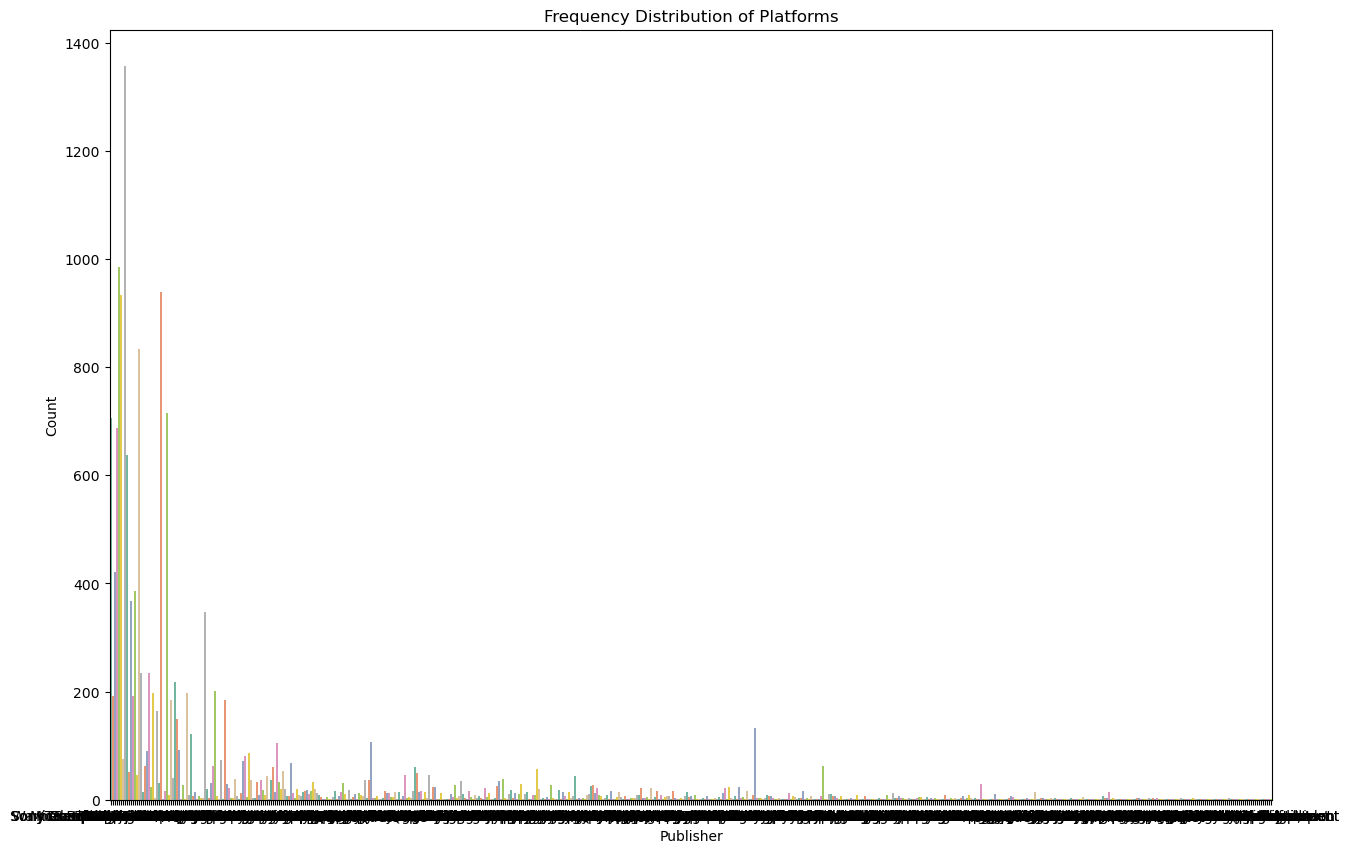

In [17]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Publisher', data=df, palette='Set2')
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.title('Frequency Distribution of Platforms')
plt.show()

In [18]:
counts = df['Publisher'].value_counts()
df['Publisher'].nunique()

581

In [19]:
def assign_publisher_type(publisher):
    if counts[publisher] < 100:
        return "SMALL PUBLISHER"
    elif counts[publisher] >= 100 and counts[publisher] < 700:
        return "MEDIUM PUBLISHER"
    elif counts[publisher] >= 700:
        return "HIGH PUBLISHER"
    else:
        return publisher

In [20]:
df["Publisher"] = df["Publisher"].apply(assign_publisher_type)

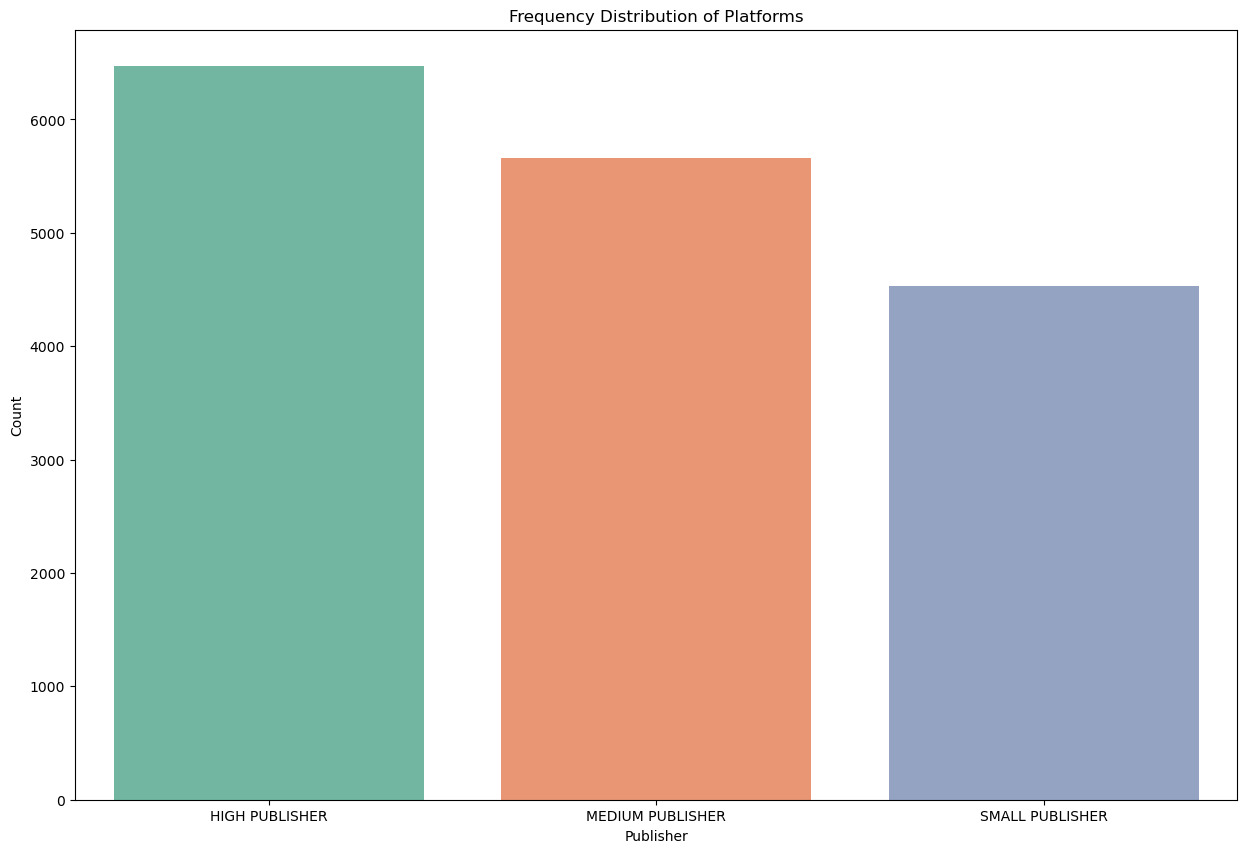

In [21]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Publisher', data=df, palette='Set2')
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.title('Frequency Distribution of Platforms')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


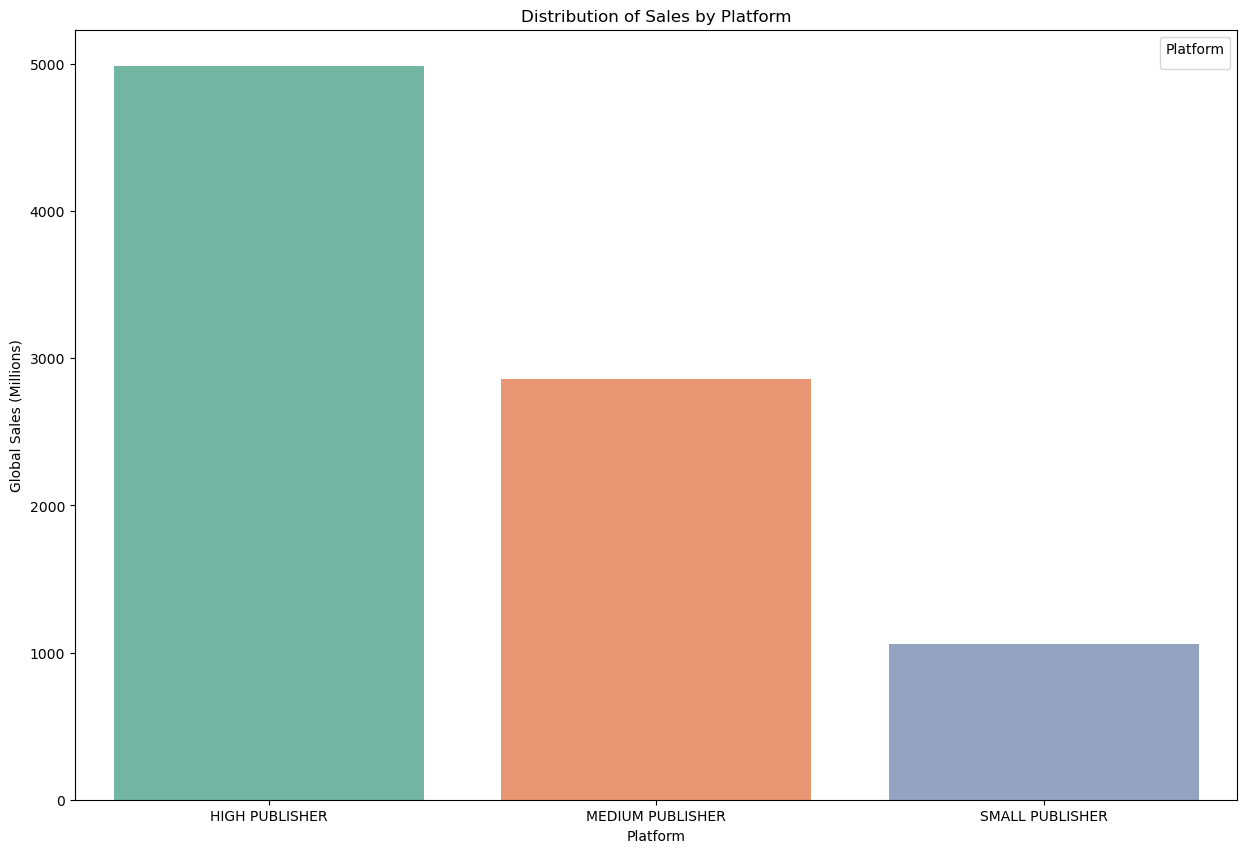

In [22]:
sales_by_platform = df.groupby('Publisher')['Global_Sales'].sum()

plt.figure(figsize=(15, 10))
sns.barplot(x=sales_by_platform.index, y=sales_by_platform.values, palette='Set2')
plt.xlabel('Platform')
plt.ylabel('Global Sales (Millions)')
plt.title('Distribution of Sales by Platform')
plt.legend(title='Platform')
plt.show()

In [23]:
onehot_columns = ['Platform', 'Genre', 'Publisher']

In [24]:
def onehot_encode(data, columns):
  for column in columns:
    dummies = pd.get_dummies(data[column], dtype='int')
    data = pd.concat([data, dummies], axis = 1)
    data.drop(column, axis=1, inplace=True)
  return data

In [25]:
df_onehot = onehot_encode(df,onehot_columns)

In [26]:
df_onehot.head()

,Year_of_Release,Global_Sales,Consola_Mano,Consola_Mesa,PC,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,HIGH PUBLISHER,MEDIUM PUBLISHER,SMALL PUBLISHER
0,2006.0,82.53,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1985.0,40.24,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,2008.0,35.52,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,2009.0,32.77,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,1996.0,31.37,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [27]:
x = df_onehot.drop('Global_Sales', axis =1)
y = df_onehot['Global_Sales']

## Hacer una regresión

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [35]:
X_train.shape

(10664, 19)

In [36]:
def build_model(hp):
    seed_value=34
    tf.random.set_seed(seed_value)
    hp_learning_rate = hp.Choice('learning_rate', values = [0.001, 0.01, 0.1])

    initializer = GlorotNormal(seed=seed_value)
    optimizer1 = Adam(learning_rate=hp_learning_rate)

    model = Sequential()
    model.add(Dense(units=hp.Int('layers_units_x', 10, 64, step=4), input_dim = X_train.shape[1],  kernel_initializer=initializer, activation='relu'))

    for i in range(hp.Int('layers_', 1, 5)):

        model.add(Dropout(rate=hp.Choice('dp_rate_'+ str(i), values = [0.25, 0.5, 0.75])))
        model.add(Dense(units=hp.Int('units_' + str(i), 10, 64, step=4),activation="relu",kernel_initializer=initializer))

    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=optimizer1, loss='mse',metrics=['mean_absolute_percentage_error','mae',coeff_determination])
    return model

In [30]:
def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.math.reduce_mean(y_true)))
    return ( 1 - (SS_res/SS_tot))

def summary_regress(actual, predicted):
    a=mean_absolute_error(actual, predicted)
    b=mean_squared_error(actual, predicted)
    c= mean_squared_error(actual, predicted)**(1/2)
    d=r2_score(actual, predicted)
    return round(a,2),round(b,2),round(c,2),round(d,2)

def summary_train_val_test(y_train_obs, y_train_pred,y_val_obs, y_val_pred,y_test_obs, y_test_pred):
  train=summary_regress(y_train_obs,y_train_pred)
  val=summary_regress(y_val_obs,y_val_pred)
  test=summary_regress(y_test_obs,y_test_pred)
  df=pd.DataFrame([train,val,test],index=["Train","Val","Test"],columns=["MAE","MSE","RMSE","R2"])
  return df

In [31]:
ruta = 'C:/Users/acorr/OneDrive/Escritorio/Universidad/ciencia_datos/proyecto/juegos'

In [37]:
tuner = kt.RandomSearch(build_model,
                     objective = 'val_loss',
                     executions_per_trial=1,
                     max_trials=100,
                     directory = ruta,
                     project_name='Regression_1',
                     )

Reloading Tuner from C:/Users/acorr/OneDrive/Escritorio/Universidad/ciencia_datos/proyecto/juegos\Regression_1\tuner0.json


In [33]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

X_train shape: (10664, 19)
y_train shape: (10664,)
X_val shape: (2666, 19)
y_val shape: (2666,)


In [38]:
tuner.search(X_train, y_train,epochs=30,verbose=0,validation_data=(X_val, y_val), batch_size= 32)

C:\Users\acorr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\acorr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\acorr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

C:\Users\acorr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\acorr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\acorr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

C:\Users\acorr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\acorr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\acorr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

C:\Users\acorr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\acorr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\acorr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

In [39]:
best_model=tuner.get_best_models(num_models=1)[0]

C:\Users\acorr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\acorr\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [40]:
best_hps1 = tuner.get_best_hyperparameters(num_trials = 5)[0].values
lrt1=best_hps1['learning_rate']
print("Learning Rate 1", lrt1)

Learning Rate 1 0.001


In [41]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 46)                  │             506 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              47 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 753 (2.94 KB)

 Trainable params: 753 (2.94 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
ytrain_pred=best_model.predict(X_train,verbose=0)
yval_pred=best_model.predict(X_val,verbose=0)
ytest_pred=best_model.predict(X_test,verbose=0)

summary_train_val_test(y_train,ytrain_pred,y_val,yval_pred,y_test,ytest_pred)

,MAE,MSE,RMSE,R2
Train,0.57,1.95,1.40,0.02
Val,0.57,1.84,1.36,0.02
Test,0.61,4.13,2.03,0.01


In [44]:
best_model.save('modelo_regresion.h5')

## Cambiar el planteamiento y hacer una clasificacion

In [45]:
df_classificacion = df.copy()

In [46]:
df_classificacion = df_classificacion[df_classificacion['Global_Sales'] < df_classificacion['Global_Sales'].quantile(0.95)]
df_classificacion['Global_Sales'] = pd.cut(df_classificacion['Global_Sales'], bins=3, labels=['Low', 'Medium', 'High'])

In [47]:
#transforma mis categorias a numeros para todas mis variables categoricas en mi dataset
label = LabelEncoder()
for col in df_classificacion.select_dtypes(include='object'):
  df_classificacion[col] = label.fit_transform(df_classificacion[col])
df_classificacion['Global_Sales'] = label.fit_transform(df_classificacion['Global_Sales'])

In [48]:
df_classificacion.head()

,Platform,Year_of_Release,Genre,Publisher,Global_Sales
839,1,1998.0,10,0,0
840,0,2008.0,3,1,0
841,1,2003.0,10,0,0
842,1,2005.0,8,0,0
843,1,2008.0,3,0,0


In [49]:
x_2 = df_classificacion.drop('Global_Sales', axis =1)
y_2 = df_classificacion['Global_Sales']

In [50]:
#y_2 = utils.to_categorical(y_2,3)

In [51]:
y_2.shape

(15826,)

In [52]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=0.2, random_state=42)
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_train_2, y_train_2, test_size=0.2, random_state=42)

In [53]:
def build_model(hp):
    seed_value=34
    tf.random.set_seed(seed_value)
    hp_learning_rate = hp.Choice('learning_rate', values = [0.001, 0.01, 0.1])

    initializer = GlorotNormal(seed=seed_value)
    optimizer1 = Adam(learning_rate=hp_learning_rate)

    model = Sequential()
    model.add(Dense(units=hp.Int('layers_units_x', 5, 50, step=1), input_dim = x_2.shape[1],  kernel_initializer=initializer, activation='relu'))

    for i in range(hp.Int('layers_', 1, 30)):

        model.add(Dropout(rate=hp.Choice('dp_rate_'+ str(i), values = [0.25, 0.5, 0.75])))
        model.add(Dense(units=hp.Int('units_' + str(i), 5, 100, step=5),activation="relu",kernel_initializer=initializer))

    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer=optimizer1, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [54]:
tuner = kt.RandomSearch(build_model,
                     objective = 'val_loss',
                     executions_per_trial=1,
                     max_trials=50,
                     directory = ruta,
                     project_name='Classificacion_2',
                     )

Reloading Tuner from C:/Users/acorr/OneDrive/Escritorio/Universidad/ciencia_datos/proyecto/juegos\Classificacion_2\tuner0.json


In [55]:
tuner.search(X_train_2, y_train_2,epochs=20,verbose=0,validation_data=(X_val_2, y_val_2), batch_size= 32)

In [63]:
model=tuner.get_best_models(num_models=1)[0]

C:\Users\acorr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\acorr\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 58 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [57]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 29)                  │             145 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 29)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 75)                  │           2,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 75)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 65)                  │           4,940 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 65)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 55)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 55)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 20)                  │           1,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 75)                  │           1,575 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 75)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 45)                  │           3,420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 45)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 25)                  │           1,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 25)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 45)                  │           1,170 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 19,083 (74.54 KB)

 Trainable params: 19,083 (74.54 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
history = model.fit(X_train_2, y_train_2, epochs=50, batch_size=32, validation_data=(X_val_2, y_val_2), verbose=0 )

In [65]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the classes for the test, validation and train sets
y_pred_test = model.predict(X_test_2)
y_pred_val = model.predict(X_val_2)
y_pred_train = model.predict(X_train_2)

# Convert the predicted probabilities to class labels
y_pred_test = np.argmax(y_pred_test, axis=1)
y_pred_val = np.argmax(y_pred_val, axis=1)
y_pred_train = np.argmax(y_pred_train, axis=1)

# Calculate the metrics for each set
accuracy_test = accuracy_score(y_test_2, y_pred_test)
precision_test = precision_score(y_test_2, y_pred_test, average='macro')
recall_test = recall_score(y_test_2, y_pred_test, average='macro')
f1_test = f1_score(y_test_2, y_pred_test, average='macro')

accuracy_val = accuracy_score(y_val_2, y_pred_val)
precision_val = precision_score(y_val_2, y_pred_val, average='macro')
recall_val = recall_score(y_val_2, y_pred_val, average='macro')
f1_val = f1_score(y_val_2, y_pred_val, average='macro')

accuracy_train = accuracy_score(y_train_2, y_pred_train)
precision_train = precision_score(y_train_2, y_pred_train, average='macro')
recall_train = recall_score(y_train_2, y_pred_train, average='macro')
f1_train = f1_score(y_train_2, y_pred_train, average='macro')

# Print the results
print("Test Set Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("\n")

print("Validation Set Metrics:")
print("Accuracy:", accuracy_val)
print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1 Score:", f1_val)
print("\n")

print("Train Set Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test Set Metrics:
Accuracy: 0.8720783322804802
Precision: 0.2906927774268267
Recall: 0.3333333333333333
F1 Score: 0.3105562116866318


Validation Set Metrics:
Accuracy: 0.8672985781990521
Precision: 0.2890995260663507
Recall: 0.3333333333333333
F1 Score: 0.3096446700507614


Train Set Metrics:
Accuracy: 0.8635466034755134
Precision: 0.2878488678251711
Recall: 0.3333333333333333
F1 Score: 0.30892585920666876


C:\Users\acorr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acorr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acorr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


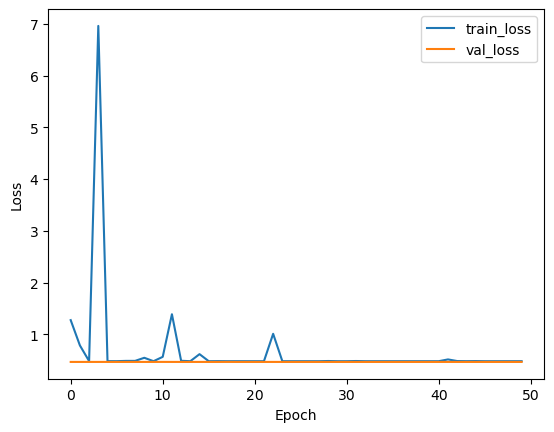

In [66]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()